## Input Parameters

In [1]:

#source EPOTFenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory)
#EPOTFenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate

#import all the libraries needed
from import_dep import *
# import custom plot style and colorbar functions
from plot_style import set_plot_style, add_colorbar, generate_colormaps_and_normalizers

# import the data import functions 
from data_import import PPMSData, import_ppms_data, import_all_datasets

# import my functions stored in the file 'VDP_functions' which can then be called with VDOP_functions.function_name()
import VDP_functions


### Plotting and Output Variables 
export_data = False # set to True to export the data to a powerpoint presentation and as svg files and export to path_out
powerpoint_string = 'WP1' # string to be added to the powerpoint file name
fig_format = 'svg' # format of the figure to be saved
plot_transparency = True # set to True to make the data plots transparent

ohm_m = 0 #set to 1 to force ohm-m units 0 to keep micro ohm cm units



# Custom Scence style settings for figures
fig_size = set_plot_style(export_data, use_tex=True)
#plt.style.use(['science', 'grid', 'nature'])

# Import all the measured data
dat_raw = import_all_datasets()

File 1 imported: JT029_SrRuO3_silver_Combined with shape (650, 5, 6)
File 2 imported: JT029_SrRuO3_silver_Combined4 with shape (7920, 5, 6)
File 3 imported: JT029_SrRuO3_silver_Combined_fullrange.txt with shape (850, 5, 6)
File 4 imported: JT029_SrRuO3_silver_HallRun1 with shape (72, 5, 6)
File 5 imported: JT029_SrRuO3_silver_Halltest2 with shape (68, 5, 6)
File 1 imported: HC003_BaSnO3_STO_061124_Hall with shape (3024, 5, 6)
File 1 imported: YF042_HfO2_STO_nosilver_Hall_2 with shape (3660, 5, 6)
File 2 imported: YF042_HfO2_STO_silver_Hall_3 with shape (2970, 5, 6)
File 3 imported: YF042_HfO2_STO_silver_Hall_5 with shape (2508, 5, 6)
File 4 imported: YF042_HfO2_STO_silver_Hall_6 with shape (2442, 5, 6)
File 5 imported: YF042_HfO2_STO_silver_Hall_7 with shape (3080, 5, 6)
Error with file: YFW042_HZO_IV_resistivity.png, 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte
File 1 imported: DR001_LaScO3__BaSnO3_STO_201124_test1 with shape (22, 5, 6)
File 2 imported: DR004

## Select Data for Plotting ***********************************************

In [2]:
# First visualise the data contained in each list
for count, dat in enumerate(dat_raw):
    print(f'dat_{count}:', [f'{count_2}={d.filename}' for count_2, d in enumerate(dat)])


# Select the data sets to be plotted and put into a single list

#dat_raw_sel = [dat_raw[0][2], dat_raw[0][0], dat_raw[0][1]] # JT029
#dat_raw_sel = [dat_raw[20][0],dat_raw[20][5]] # JT082

#dat_raw_sel = [dat_raw[3][1]] # DR001
#dat_raw_sel = [dat_raw[4][5], dat_raw[4][7], dat_raw[4][9]] # , dat_raw[4][10], dat_raw[4][11],dat_raw[4][12]] # DR003
#dat_raw_sel = [dat_raw[3][0],dat_raw[3][1], dat_raw[3][2], dat_raw[3][3]] # DR004
dat_raw_sel =  [dat_raw[14][5], dat_raw[14][1], dat_raw[14][7]]#, dat_raw[14][2]] # DR008a

#dat_raw_sel = [ dat_raw[17][4],dat_raw[17][3],dat_raw[17][2], dat_raw[17][0]] #dat_raw[17][1],  dat_raw[17][0],   ] # DR009
#dat_raw_sel = [dat_raw[18][0], dat_raw[18][1],dat_raw[18][3] ] # DR010
#dat_raw_sel = [dat_raw[21][0]] # DR011
#dat_raw_sel = [ dat_raw[19][4], dat_raw[19][3], dat_raw[19][2]]#, dat_raw[19][0]] # DR012
#dat_raw_sel = [ dat_raw[21][0], dat_raw[19][4], dat_raw[19][3], dat_raw[17][4] , dat_raw[18][1],dat_raw[18][3],dat_raw[18][0], dat_raw[14][5], dat_raw[14][1], dat_raw[14][7]] # DR Combined

#dat_raw_sel = [dat_raw[2][3] , dat_raw[2][2],  dat_raw[2][4], dat_raw[2][1]] # YFW042
#dat_raw_sel = [dat_raw[8][1], dat_raw[8][2]]    #,dat_raw[2][4],dat_raw[2][5]] YFW044
#dat_raw_sel = [ dat_raw[9][1], dat_raw[9][2], dat_raw[9][4]] #YFW046
#dat_raw_sel = [dat_raw[2][1], dat_raw[2][2], dat_raw[2][3], dat_raw[2][4], dat_raw[8][1], dat_raw[8][2], dat_raw[9][4]] # YFW Combined

#dat_raw_sel = dat_raw[1] # HC003
#dat_raw_sel = [dat_raw[10][0], dat_raw[10][4]] # HC011 ********* THE CURRENT IS INVERTED FOR THIS SAMPLE!!! **********
#dat_raw_sel = [dat_raw[11][0],dat_raw[11][4]] #,dat_raw[11][5]] # HC013
#dat_raw_sel = [dat_raw[12][3], dat_raw[12][0],dat_raw[12][1],dat_raw[12][2]] # HC014
#dat_raw_sel = [dat_raw[15][1], dat_raw[15][2]] #HC016
#dat_raw_sel = [dat_raw[16][1]]  #HC015
#dat_raw_sel = [dat_raw[15][1], dat_raw[11][0],dat_raw[11][4],dat_raw[10][0], dat_raw[10][4],dat_raw[16][1]] # HC Combined

# 2DEG combined
#dat_raw_sel = [dat_raw[20][0],dat_raw[18][1],dat_raw[18][3],dat_raw[18][0],dat_raw[17][4],dat_raw[10][0], dat_raw[10][4], dat_raw[4][7], dat_raw[2][4], dat_raw[2][1], dat_raw[8][1],dat_raw[9][4], dat_raw[11][0],dat_raw[11][4],dat_raw[14][1],dat_raw[16][1], dat_raw[15][1]] 


#dat_raw_sel = [dat_raw[13][5], dat_raw[13][2], dat_raw[13][3]] # DV127

mag_dat = dat_raw_sel


print('dat_raw_sel:', [f'{count}={d.filename}' for count, d in enumerate(dat_raw_sel)])


dat_0: ['0=JT029_SrRuO3_silver_Combined', '1=JT029_SrRuO3_silver_Combined4', '2=JT029_SrRuO3_silver_Combined_fullrange.txt', '3=JT029_SrRuO3_silver_HallRun1', '4=JT029_SrRuO3_silver_Halltest2']
dat_1: ['0=HC003_BaSnO3_STO_061124_Hall']
dat_2: ['0=YF042_HfO2_STO_nosilver_Hall_2', '1=YF042_HfO2_STO_silver_Hall_3', '2=YF042_HfO2_STO_silver_Hall_5', '3=YF042_HfO2_STO_silver_Hall_6', '4=YF042_HfO2_STO_silver_Hall_7']
dat_3: ['0=DR001_LaScO3__BaSnO3_STO_201124_test1', '1=DR004_LaScO3__BaSnO3_STO_201124_combined3', '2=DR004_LaScO3__BaSnO3_STO_201124_combined4', '3=DR004_LaScO3__BaSnO3_STO_201124_combined5', '4=DR004_LaScO3__BaSnO3_STO_201124_combined6', '5=DR004_LaScO3__BaSnO3_STO_201124_test2']
dat_4: ['0=DR003_LaScO3__BaSnO3_STO_nosilver_combined1', '1=DR003_LaScO3__BaSnO3_STO_nosilver_combined2', '2=DR003_LaScO3__BaSnO3_STO_nosilver_test2', '3=DR003_LaScO3__BaSnO3_STO_nosilver_test3', '4=DR003_LaScO3__BaSnO3_STO_nosilver_test4', '5=DR003_LaScO3__BaSnO3_STO_silver_combined10', '6=DR003_LaSc

## ************************************************************************************************************************

## Extract and Check Temperature, Field, and Current values

In [3]:
# Reduced_data = [1,-5] means that the first and last 5 temperature points are removed from the data
# Reduced_temp = [3,-1] will skip the first 3 temperature points and the last 1 temperature point
# Reduced_current = 2 will skip the first 2 current points and the last 2 current points

# Extract Data - check you have the expected and correct Temperature, Field and Current values!
dat, unit_scale = VDP_functions.extract_ctf(dat_raw_sel,Reduced_temp = False, Reduced_current=False, ohm_m=ohm_m)


# Update a single data file with reduced temperature or current values
#dat[1] = VDP_functions.extract_ctf([dat_raw_sel[1]], Reduced_temp = [1,0], Reduced_current=False)[0]
#dat[3] = VDP_functions.extract_ctf([dat_raw_sel[3]], Reduced_temp = [0,-2], Reduced_current=False)[0]

# Generate the colormaps and normalizers for the data
[cmap_temp, cmap_field, norm_temp, norm_field, mark_p, min_temp, max_temp, min_field, max_field] = generate_colormaps_and_normalizers(dat)

# If exporting the data this ensures that the labels are updated by the user to be correct from their original "filename" assignement
if export_data == True: 
    dat = VDP_functions.update_plot_string(dat)




single: Field values originally in the order 0,-Bmax->0->Bmax
For file: DR008a_LaScO3__BaSnO3_STO_silver_doubleannealed_run9
9 Currents (uA): [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
16 Temperatures (K): [302. 282. 262. 242. 222. 202. 182. 162. 142. 122. 102.  82.  62.  42.
  22.   2.]
14 Fields (kOe): [-90. -75. -60. -45. -30. -15.   0.  -0.  15.  30.  45.  60.  75.  90.]
Is this correct?
tempshape 2
WARNING Potential Temperature Issues: The erronous temperature points are: [321. 261.]
double: Field values originally in the order 0->Bmax,-Bmax->0
For file: DR008a_LaScO3__BaSnO3_STO_silver_annealed_run6
9 Currents (uA): [-40. -30. -20. -10.   0.  10.  20.  30.  40.]
17 Temperatures (K): [322. 302. 282. 262. 242. 222. 202. 182. 162. 142. 122. 102.  82.  62.
  42.  22.   2.]
14 Fields (kOe): [-90. -75. -60. -45. -30. -15.  -0.   0.  15.  30.  45.  60.  75.  90.]
Is this correct?
double: Field values originally in the order 0->Bmax,-Bmax->0
For file: DR008a_LaScO3__BaSnO3_STO_silver_run2
9 C

## Calculate VDP Resistivity, Magnetoresistance, Hall Coefficient and Hall Mobility


In [4]:
# Extract the resistivity using the VDP method and write to the PPMSData objects in the list "dat"
dat = VDP_functions.vdp_resistivity(dat, print_val = False, resistivity_guess = 0)

# Calculate the magnetoresistance at each temperature and field strength
# mag_res(temperature, field, index) where: index 0 = VDP config A, index 1 = VDP config B, index 2 = average of A and B
dat = VDP_functions.magnetoresistance(dat, exclude_res=True)

# Calculate the Hall coefficient and mobility
# hall_mobility(temperature, field, index) where: index 0 = VDP config A, index 1 = VDP config B, index 2 = average of A and B
dat = VDP_functions.vdp_hall(dat)


## Resistivity vs Temperature

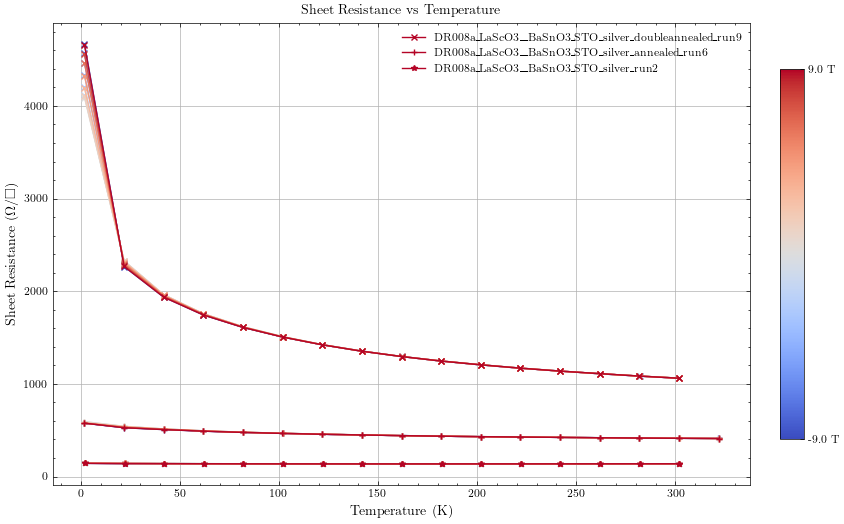

In [5]:
# Create a figure and GridSpec layout
fig4 = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig4.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_field, norm=norm_field)
add_colorbar(fig4, gs[1], sm, min_field, max_field, fig_size)


# Loop over the data sets
for j, d in enumerate(dat):
    # Loop over the B fields
    for Bi in range(d.ctf[5]):
        
        # Plot rho_film vs Temp
        ax.plot(d.res_data[:,Bi, 0], d.res_data[:,Bi, 4] * unit_scale, marker=mark_p[j], color=cmap_field(norm_field(d.res_data[0, Bi, 1])))

    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color=cmap_field(norm_field(d.res_data[0, Bi, 1])), label=f'{d.plot_str}')
    
# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'Sheet Resistance ($\Omega/\square$)')
    ax.set_title(f'Sheet Resistance vs Temperature')
    
elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
    ax.set_title('Resistivity vs Temperature')
    
else:
    ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')
    ax.set_title('Resistivity vs Temperature')

# Add a legend
ax.legend()


#ax.set_xlim(0,3)
#ax.set_ylim(1e5, 4e6)
#ax.set_ylim(136.4, 137)
#ax.set_yscale('log')


# Show the plot
plt.show()

if export_data == True:
    fig4.savefig(dat[0].directory.joinpath(f'{dat[0].plot_str}_rho_xx_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

- Anderson localisation causes the metal insulator transition at low T
- If you have defects in film, they can have an external effect of localising charge carriers and reducing the conductivity
    - Also causes loss of metalicity beneath a certain thicknes of LSMO etc
    -  Defects localise the previously delocalised charge carriers, either due to thickness reudction or low T
    - Low thicknes its because number of defects is constant - > higher defect density
    

## Resitivity vs Temperature for B=0 ONLY

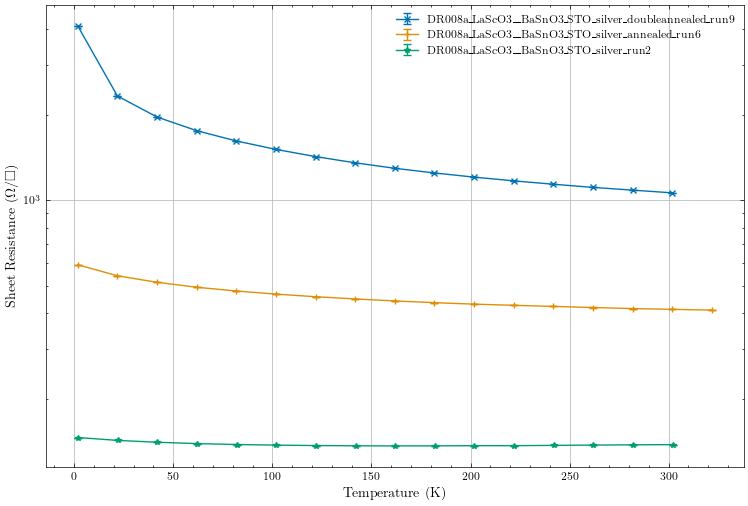

In [6]:
# Create a figure and axis
fig5 = plt.figure()
ax = fig5.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for j, d in enumerate(dat):
    # Loop over a single B field
    for Bi in  [int(d.ctf[5]/2)]: 

        # Plot errorbar scaling the error by unit scale as well
        ax.errorbar(d.res_data[:, Bi, 0], d.res_data[:, Bi, 4] * unit_scale, yerr = d.res_data[:, Bi, 5] * unit_scale,fmt='-'+mark_p[j], capsize=3, label=f'{d.plot_str}')
      
    # Create a DataFrame with the x and y data
    #df = pd.DataFrame({'Temperature (K)': d.res_data[:, Bi, 0], 'Resistivity': d.res_data[:, Bi, 4] * unit_scale})
    # Write the DataFrame to an Excel file
    #df.to_excel(f'{d.filename}_data.xlsx', index=False)

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'Sheet Resistance ($\Omega/\square$)')
    
elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
    
else:
    ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')

# Add a legend
ax.legend()

#ax.set_xlim(0,0.3)
#ax.set_ylim(1e5, 4e6)
#ax.set_ylim(136.4, 137)
ax.set_yscale('log')



# Show the plot
plt.show()

if export_data == True:
    fig5.savefig(dat[0].directory.joinpath(f'{dat[0].plot_str}_rho_xx_B0_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Data Filtering on Resistivity Data
- There appear to be outliers where an error is thrown
- This is confirmed by repeat experiments where the spikes in resistivity are not consistent

In [7]:
## Median Filter
filt_kern = 0
if filt_kern != 0:
    for j, d in enumerate(dat):
        for t_count, t in enumerate(d.ctf[1], start=0):  
            
            # Filter the resistivity data    
            res_dat = d.res_data[t_count*d.ctf[5]:(t_count+1)*d.ctf[5], 4]
            res_dat_filtered = scipy.signal.medfilt(res_dat, kernel_size=filt_kern)
            d.res_data[t_count*d.ctf[5]:(t_count+1)*d.ctf[5], 4] = res_dat_filtered

            # Filter the Hall data
            index = t_count * d.ctf[5]
            hall_dat = d.hall_data[index:index+d.ctf[5], 6]
            hall_dat_filtered = scipy.signal.medfilt(hall_dat, kernel_size=filt_kern)
            d.hall_data[index:index+d.ctf[5], 6] = hall_dat_filtered
    
    
    # Re-calculate the magnetoresistance after filtering (exclude_res makes sure it doesn't recalculate the resistivity and overwrite the filtering)      
    dat = VDP_functions.magnetoresistance(dat, exclude_res=True)
    
## Gaussian Smoothing Filter
filt_sigma = 0
if filt_sigma != 0:
    for j, d in enumerate(dat):
        for t_count, t in enumerate(d.ctf[1], start=0):   
            
            # Filter the resistivity data      
            res_dat = d.res_data[t_count*d.ctf[5]:(t_count+1)*d.ctf[5], 4]
            res_dat_smoothed = scipy.ndimage.gaussian_filter1d(res_dat, sigma=filt_sigma)
            d.res_data[t_count*d.ctf[5]:(t_count+1)*d.ctf[5], 4] = res_dat_smoothed
            
            # Filter the Hall data
            index = t_count * d.ctf[5]
            hall_dat = d.hall_data[index:index+d.ctf[5], 6]
            hall_dat_smoothed = scipy.ndimage.gaussian_filter1d(hall_dat,  sigma=filt_sigma)
            d.hall_data[index:index+d.ctf[5], 6] = hall_dat_smoothed
    
    
    # Re-calculate the magnetoresistance after smoothing (exclude_res makes sure it doesn't recalculate the resistivity and overwrite the smoothing)      
    dat = VDP_functions.magnetoresistance(dat, exclude_res=True)

## Z-score outlier detection
threshold = 0  # Z-score threshold for detecting outliers (lower threshold means more points are considered outliers (2 is typical value))
if threshold != 0:
    for j, d in enumerate(dat):
        for t_count, t in enumerate(d.ctf[1], start=0):      
            res_dat = d.res_data[t_count*d.ctf[5]:(t_count+1)*d.ctf[5], 4]
            
            # Calculate the Z-scores of the data
            z_scores = zscore(res_dat)
            
            # Identify outliers
            outliers = np.abs(z_scores) > threshold
            
            # Replace outliers with interpolated values
            res_dat_filtered = res_dat.copy()
            res_dat_filtered[outliers] = np.interp(np.flatnonzero(outliers), np.flatnonzero(~outliers), res_dat[~outliers])
            
            d.res_data[t_count*d.ctf[5]:(t_count+1)*d.ctf[5], 4] = res_dat_filtered
    
    # Re-calculate the magnetoresistance after filtering (exclude_res makes sure it doesn't recalculate the resistivity and overwrite the filtering)      
    dat = VDP_functions.magnetoresistance(dat, exclude_res=True)

## Magnetoresistance vs H
- Plotting the magnetoresistance vs the Applied field strength (H) for several temperatures

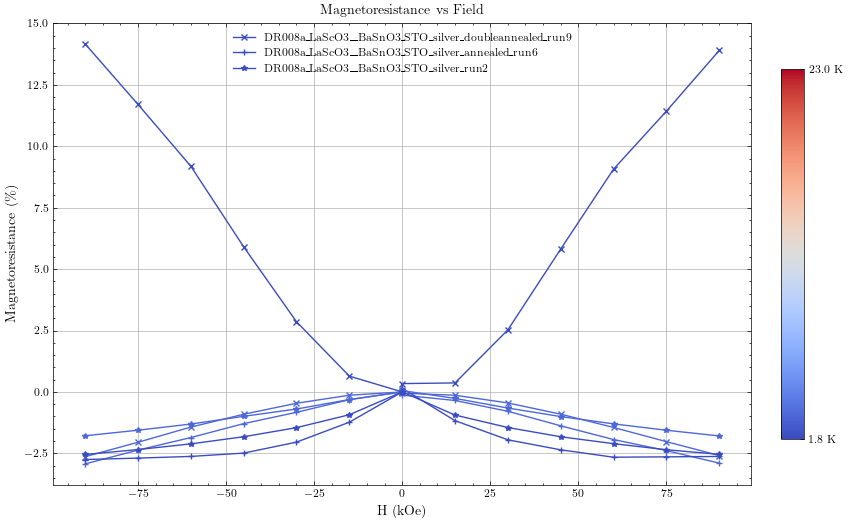

In [8]:
# Create a figure and GridSpec layout
fig7 = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig7.add_subplot(gs[0])


temp_limit = 23
# Normalize the temperature and field values
norm_temp_mag = Normalize(vmin=min_temp, vmax=temp_limit )


# Loop over the data sets
for j, d in enumerate(mag_dat):
    # Loop over the temperatures
    for Ti, T in enumerate(d.ctf[1], start=0):  
        if T< temp_limit:
                # Add a plot of magnetoresistance vs field strength for each loop of temperature (excluding last field point which is repeat of B=0)
                ax.plot(d.tf_av[Ti,:,1] * 10, d.mag_res[Ti, :, 2], marker=mark_p[j], color=cmap_temp(norm_temp(T)))
                #ax.plot(d.tf_av[Ti,:,1] * 10, d.mag_res[Ti, :, 1]-d.mag_res[Ti, :, 0], marker=mark_p[j], color=cmap_temp(norm_temp(T)), linestyle=':')
                
    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color=cmap_temp(norm_temp_mag(T)), label=f'{d.plot_str}')
    #ax.plot([], [], marker = mark_p[j], color=cmap_temp(norm_temp_mag(T)), label=f'{d.filename}(configA-configB)', linestyle=':')
        
ax.set_xlabel('H (kOe)')
ax.set_ylabel(r'Magnetoresistance (\%)')
ax.set_title(f'Magnetoresistance vs Field')
ax.legend()

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_temp, norm=norm_temp_mag)
add_colorbar(fig7, gs[1], sm, min_temp, temp_limit, fig_size, field = False)

#ax.set_ylim(-2, 2)

plt.show()

if export_data == True:
    fig7.savefig(dat[0].directory.joinpath(f'{dat[0].plot_str}_magnetoresistance_vs_field.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

- The longitudinal resistance exhibits a rapid decrease, attributed to weak localization (WL), a phenomenon commonly observed in  disordered semiconductor systems
- The magnetoresistance (MR) exhibited a parabolic behavior within the intermediate magnetic field range (1.5T to 4T), as illustrated in Figure 5(b). Concurrently, at the fields where SdH oscillations emerge, it indicates the onset of quantum effects that dominate over the classical parabolic behavior.

## Arhenius Plot

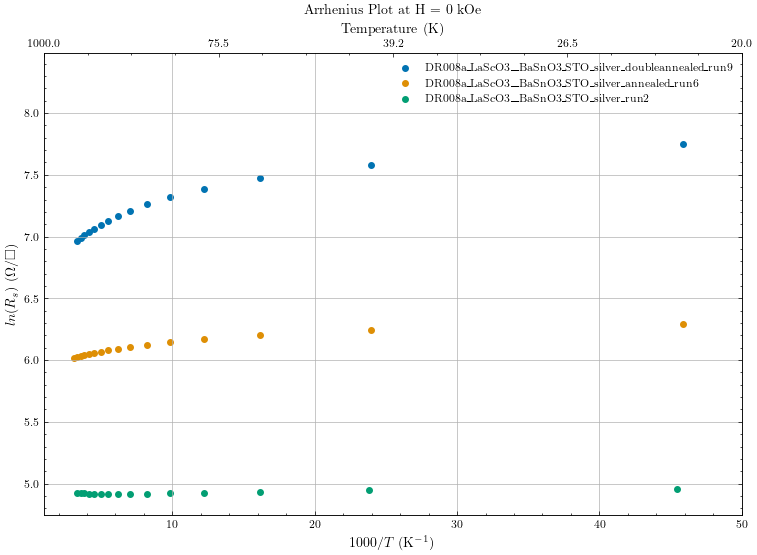

In [9]:
# Create a figure and axis
fig9 = plt.figure()
ax = fig9.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for j, d in enumerate(dat):
    # Plot rho_film vs 1000/Temp
    Bi_zero = int(d.ctf[5]/2)-1
    ax.scatter(1000 / d.res_data[:, Bi_zero, 0], np.log(d.res_data[:, Bi_zero, 4]), marker='o', linestyle='-', label=f'{d.plot_str}')


# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel(r'$1000/T$ (K$^{-1}$)')
ax.set_title(r'Arrhenius Plot at H = 0 kOe')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$ln(R_s)$ ($\Omega/\square$)')
else:
    ax.set_ylabel(r'$\ln(\rho)$ ($\Omega \cdot m$)')


# Add a legend
ax.legend()

# Create a secondary x-axis at the top
ax2 = ax.twiny()

ax.set_xlim(1, 50)

# Set the limits of the secondary x-axis to match the primary x-axis
ax2.set_xlim(ax.get_xlim())

# Set the ticks and labels for the secondary x-axis
new_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num=5)
ax2.set_xticks(new_ticks)
ax2.set_xticklabels([f'{1000/tick:.1f}' for tick in new_ticks])
ax2.set_xlabel('Temperature (K)')
# Disable grid lines for the secondary x-axis
ax2.grid(False)



# Show the plot
plt.show()

if export_data == True:
    fig9.savefig(dat[0].directory.joinpath(f'{dat[0].plot_str}_Arrhenius Plot.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Log(R) vs Log(T)

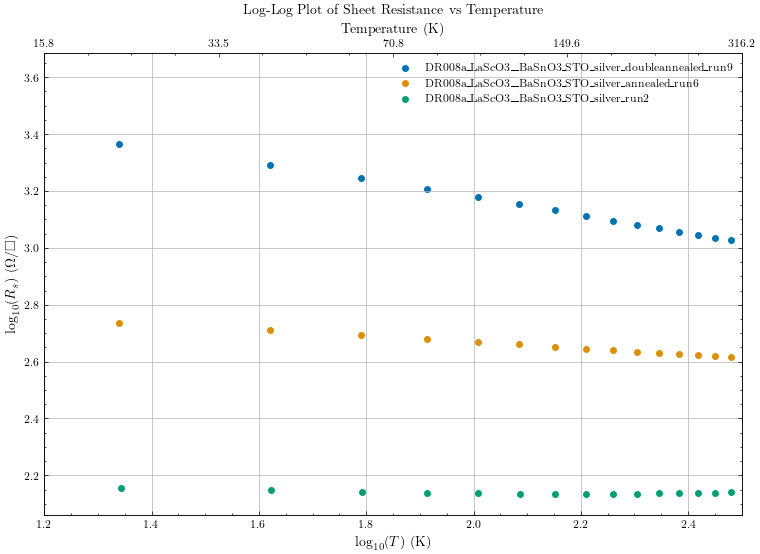

In [10]:
# Create a figure and axis
fig10 = plt.figure()
ax = fig10.add_subplot(111)  # Create a single subplot

# Loop over the data sets
for j, d in enumerate(dat):
    # Plot log10(rho_film) vs log10(Temp)
    Bi_zero = int(d.ctf[5]/2)-1
    ax.scatter(np.log10(d.res_data[:, Bi_zero, 0]), np.log10(d.res_data[:, Bi_zero, 4]), marker='o', linestyle='-', label=f'{d.plot_str}')

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel(r'$\log_{10}(T)$ (K)')
ax.set_title(r'Arrhenius Plot at H = 0 kOe')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$\log_{10}(R_s)$ ($\Omega/ \square$)')
    ax.set_title(r'Log-Log Plot of Sheet Resistance vs Temperature')
else:
    ax.set_ylabel(r'$\log_{10}(\rho)$ ($\Omega \cdot m$)')
    ax.set_title(r'Log-Log Plot of Resistivity vs Temperature')


# Add lines of n=1 and n=2 with best fit intercepts
x_vals = np.linspace(np.log10(min_temp), np.log10(max_temp), 100)

# Calculate the best fit intercept for n=1
for j, d in enumerate(dat):
    Bi_zero = int(d.ctf[5]/2)-1
    log_T = np.log10(d.res_data[:, Bi_zero, 0])
    log_R = np.log10(d.res_data[:, Bi_zero, 4])
    
    # slope_1 = 1
    # intercept_1 = np.mean(log_R - slope_1 * log_T)
    # ax.plot(x_vals, slope_1 * x_vals + intercept_1, label=f'n=1 (fit {d.filename})', linestyle='--', color='r')

    #slope_2 = 2
    #intercept_2 = np.mean(log_R - slope_2 * log_T)
    #ax.plot(x_vals, slope_2 * x_vals + intercept_2, label=f'n=2 (fit {d.filename})', linestyle='--', color='b')

# Add a legend
ax.legend()

# Create a secondary x-axis at the top
ax2 = ax.twiny()

ax.set_xlim(1.2, 2.5)

# Set the limits of the secondary x-axis to match the primary x-axis
ax2.set_xlim(ax.get_xlim())

# Set the ticks and labels for the secondary x-axis
log_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num=5)
ax2.set_xticks(log_ticks)
ax2.set_xticklabels([f'{10**tick:.1f}' for tick in log_ticks])
ax2.set_xlabel('Temperature (K)')

# Disable grid lines for the secondary x-axis
ax2.grid(False)

# Show the plot
plt.show()

if export_data == True:
    fig10.savefig(dat[0].directory.joinpath(f'{dat[0].plot_str}_LogR_vs_LogT.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Hall resisitivity vs Temperature

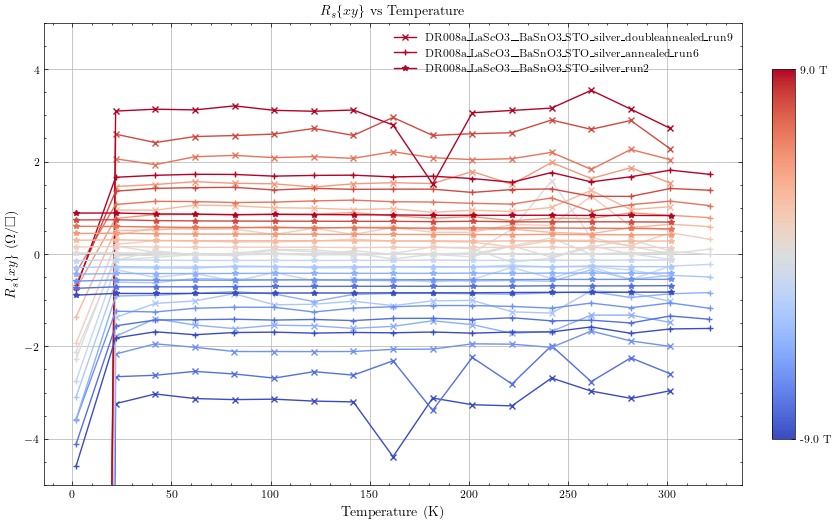

In [11]:
# Create a figure and GridSpec layout
fig13 = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig13.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_field, norm=norm_field)
add_colorbar(fig13, gs[1], sm, min_field, max_field, fig_size)

# Loop over the data sets
for j, d in enumerate(dat):
    # Loop over the B fields
    for Bi in range(d.ctf[5]):
        # Plot rho_film vs Temp
        ax.plot(d.hall_data[:, Bi, 0], d.hall_data[:, Bi, 6] * unit_scale, marker=mark_p[j], color= cmap_field(norm_field(d.hall_data[0, Bi, 1])))

    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color = cmap_field(norm_field(d.hall_data[0, Bi, 1])), label=f'{d.plot_str}')
        
        
# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:

    ax.set_ylabel(r'$R_{s}\{xy\}$ ($\Omega/\square$)')
    ax.set_title(r'$R_{s}\{xy\}$ vs Temperature')

elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
    ax.set_title(r'$\rho_{xy}$ vs Temperature')

else:
    ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
    ax.set_title(r'$\rho_{xy}$ vs Temperature')
# Set labels and title


# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a legend
ax.legend()

# Show the plot
ax.set_ylim(-5,5)
plt.show()

if export_data == True:
    fig13.savefig(dat[0].directory.joinpath(f'{dat[0].plot_str}_rho_xy_vs_T.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Hall Resistivity vs Field

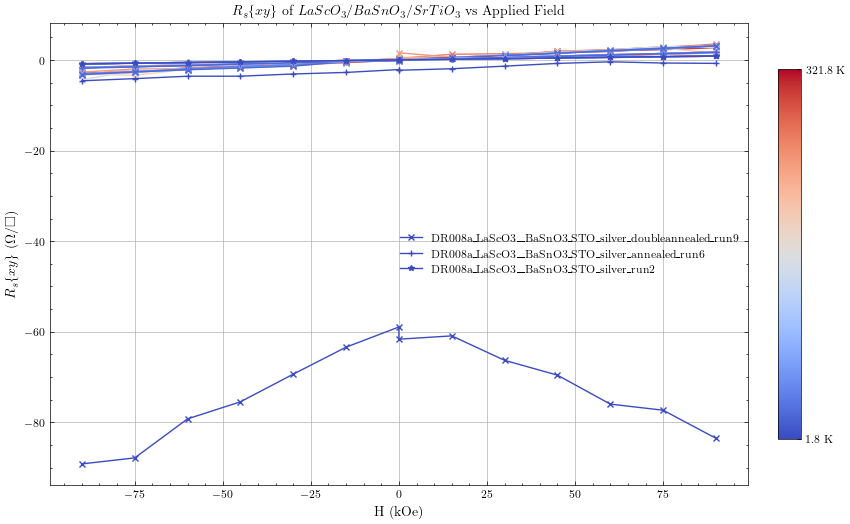

In [12]:
# Create a figure and GridSpec layout
fig14 = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig14.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_temp, norm=norm_temp)
add_colorbar(fig14, gs[1], sm, min_temp, max_temp, fig_size, field = False)


# Loop over the data sets
for j, d in enumerate(dat):

    for Ti, T in enumerate(d.ctf[1], start=0):

        # Plot rho_film vs Temp
        ax.plot(d.hall_data[Ti, :, 1]*10, d.hall_data[Ti, :, 6]*unit_scale, marker=mark_p[j], color=cmap_temp(norm_temp(T)))
        
    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color = cmap_temp(norm_temp(T)), label=f'{d.plot_str}')


# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('H (kOe)')
if dat[0].film_thickness == 1:

    ax.set_ylabel(r'$R_{s}\{xy\}$ ($\Omega/\square$)')
    ax.set_title(r'$R_{s}\{xy\}$' f' of {d.material} vs Applied Field')
    
elif ohm_m == 1:
    ax.set_ylabel(r'$\rho_{xy}\, ($\Omega \cdot$m)')
    ax.set_title(r'$\rho_{xy}$' f' of {d.material} vs Applied Field')
    
else:
    ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
    ax.set_title(r'$\rho_{xy}$' f' of {d.material} vs Applied Field')
    


# Add a legend
ax.legend()

#ax.set_ylim(-10,10)
# Show the plot
plt.show()

if export_data == True:
    fig14.savefig(dat[0].directory.joinpath(f'{dat[0].plot_str}_rho_xy_vs_field.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Mobility and Charge Carrier Density

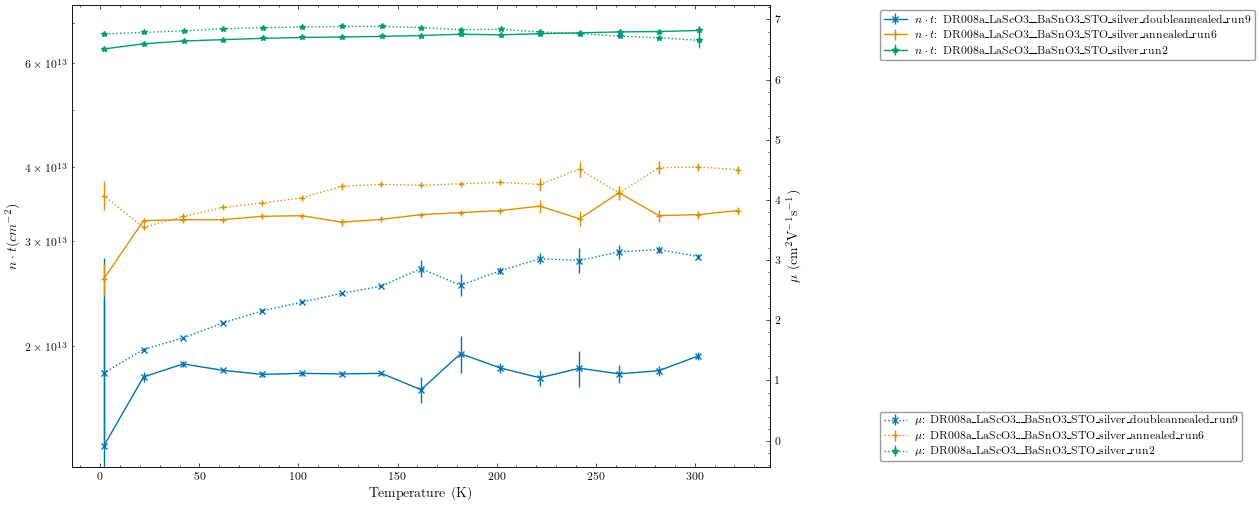

In [13]:
# Create a figure and axis
fig18 = plt.figure()
ax = fig18.add_subplot(111)  # Create a single subplot
# Create a second y-axis on the right
ax2 = ax.twinx()

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$n\cdot t$' r'($cm^{-2}$)')
    
    # set a label to pass as a prefix to the plot string
    n_label = r'$n\cdot t$: '
    #ax.set_title(r'$n\cdot t$ vs Temperature (2DEG)')
else:
    ax.set_ylabel(r'n($cm^{-3}$)')
    # set a label to pass as a prefix to the plot string
    n_label = r'$n$: '
    #ax.set_title(r'Charge Carrier Density vs Temperature') 
    
# Loop over the data sets
for j, d in enumerate(dat):
    
    # Plot the charge carrier density on the left y-axis
    ax.errorbar(d.hall_coefficient[:, 0], d.hall_coefficient[:, 7],yerr = d.hall_coefficient[:, 8], fmt='-'+mark_p[j], label=f'{n_label}{d.plot_str}')

    # Plot the mobility on the right y-axis
    ax2.errorbar(d.hall_coefficient[:, 0], d.hall_coefficient[:, 9],yerr = d.hall_coefficient[:, 10], fmt=':'+mark_p[j], label=r'$\mu$'f': {d.plot_str}')


# Add legends
ax.legend(loc='upper left', bbox_to_anchor=(1.15, 1), framealpha=0.4, edgecolor='black', frameon=True)
ax2.legend( loc='lower left', bbox_to_anchor=(1.15, 0.0), framealpha=0.4, edgecolor='black', frameon=True)

# Set labels for the right y-axis
ax2.set_ylabel(r'$\mu$ (cm$^2$V$^{-1}$s$^{-1}$)')

ax.grid(False)
ax2.grid(False)

#ax2.set_ylim(0,20)
ax.set_yscale('log')

plt.show()

if export_data == True:
    fig18.savefig(dat[0].directory.joinpath(f'{dat[0].plot_str}_n_u_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Charge Carrier Density Only

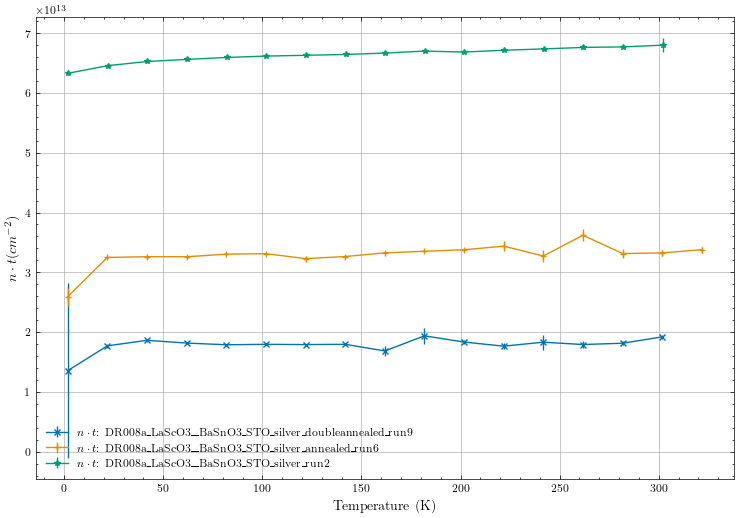

In [14]:
# Create a figure and axis
fig19 = plt.figure()
ax = fig19.add_subplot(111)  # Create a single subplot

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$n\cdot t$' r'($cm^{-2}$)')
    
    # set a label to pass as a prefix to the plot string
    n_label = r'$n\cdot t$: '
    #ax.set_title(r'$n\cdot t$ vs Temperature (2DEG)')
else:
    ax.set_ylabel(r'n($cm^{-3}$)')
    # set a label to pass as a prefix to the plot string
    n_label = r'$n$: '
    #ax.set_title(r'Charge Carrier Density vs Temperature') 
    
    
for j, d in enumerate(dat):
    
    ax.errorbar(d.hall_coefficient[:, 0], d.hall_coefficient[:, 7],yerr = d.hall_coefficient[:, 8], fmt='-'+mark_p[j], label=f'{n_label}{d.plot_str}')

# Add a legend for the y-axis
ax.legend()


#ax.set_xlim(0, 304)

# Show the plot
plt.show()

if export_data == True:
    fig19.savefig(dat[0].directory.joinpath(f'{dat[0].plot_str}_n_only_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Mobility Only

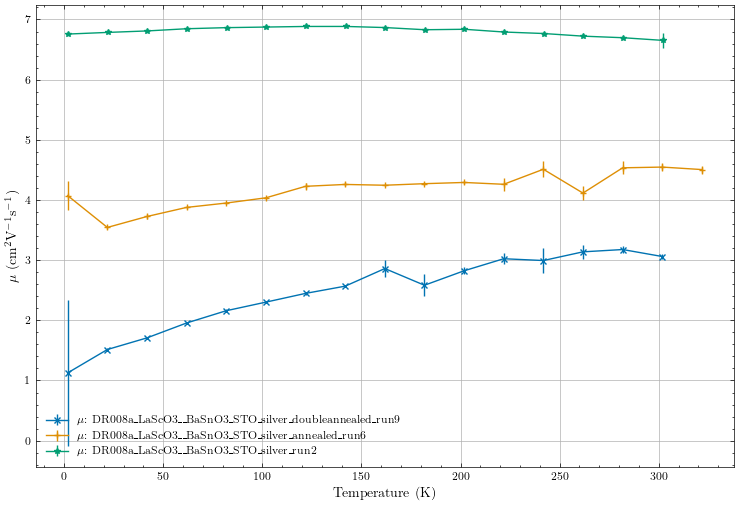

In [15]:
# Create a figure and axis
fig20 = plt.figure()
ax = fig20.add_subplot(111)  # Create a single subplot

# Plot data on the right y-axis
for j, d in enumerate(dat, start=0):

    ax.errorbar(d.hall_coefficient[:, 0], d.hall_coefficient[:, 9],yerr = d.hall_coefficient[:, 10], fmt='-'+mark_p[j],  label=r'$\mu$'f': {d.plot_str}')

# Set labels for the right y-axis
ax.set_ylabel(r'$\mu$ (cm$^2$V$^{-1}$s$^{-1}$)')

# Set labels and title for either sheet resistance or resistivity
ax.set_xlabel('Temperature (K)')

        
# Add a legend for the left y-axis
ax.legend()


# Show the plot
plt.show()

if export_data == True:
    fig20.savefig(dat[0].directory.joinpath(f'{dat[0].plot_str}_u_only_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## $\rho_{xy}$ vs $\rho_{xx}$
- Can have problems where with both holes and electrons the carriers can cancel out the measured hall voltage
- Need to check this?

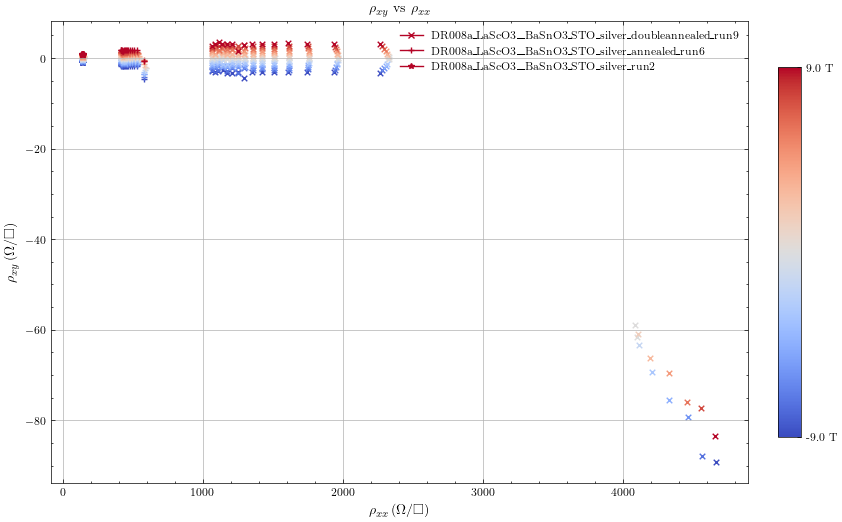

In [16]:
# Create a figure and GridSpec layout
fig21 = plt.figure(figsize= (fig_size[0] + fig_size[0]/9 , fig_size[1]) )
gs = gridspec.GridSpec(1, 2, width_ratios=[fig_size[0], fig_size[0]/9], wspace=0.0)

# Create the main plot
ax = fig21.add_subplot(gs[0])

# Add and adjust the colorbar using a custom function
sm = ScalarMappable(cmap=cmap_field, norm=norm_field)
add_colorbar(fig21, gs[1], sm, min_field, max_field, fig_size)

# Loop over the data sets
for j, d in enumerate(dat, start=0):
    for Bi, B in enumerate(d.ctf[2], start=0):
        # Plot rho_film vs Temp
        ax.scatter(d.res_data[:, Bi, 4] * unit_scale, d.hall_data[:, Bi, 6] * unit_scale, marker=mark_p[j], color=cmap_field(norm_field(B)))

    # Add a dummy plot for the legend entry
    ax.plot([], [], marker = mark_p[j], color = cmap_field(norm_field(B)), label=f'{d.plot_str}')

ax.set_title(r'$\rho_{xy}$ vs $\rho_{xx}$')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'$\rho_{xy}\,(\Omega/\square)$')
    ax.set_xlabel(r'$\rho_{xx}\,(\Omega/\square)$')

elif ohm_m == 1:
    ax.set_ylabel(r'$\rho_{xy}\,(\Omega \cdot m)$')
    ax.set_xlabel(r'$\rho_{xx}\,(\Omega \cdot m)$')
    
else:
    ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
    ax.set_xlabel(r'$\rho_{xx}\,(\mu \Omega \cdot cm)$')

# Add a legend
ax.legend()

# Show the plot
plt.show()

if export_data == True:
    fig21.savefig(dat[0].directory.joinpath(f'{dat[0].plot_str}_rho_xx_vs_rho_xy.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Combined Plot

/var/folders/xr/wc8tnsks36n8ywxxvqplwqch0000gn/T/ipykernel_60757/1544779396.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


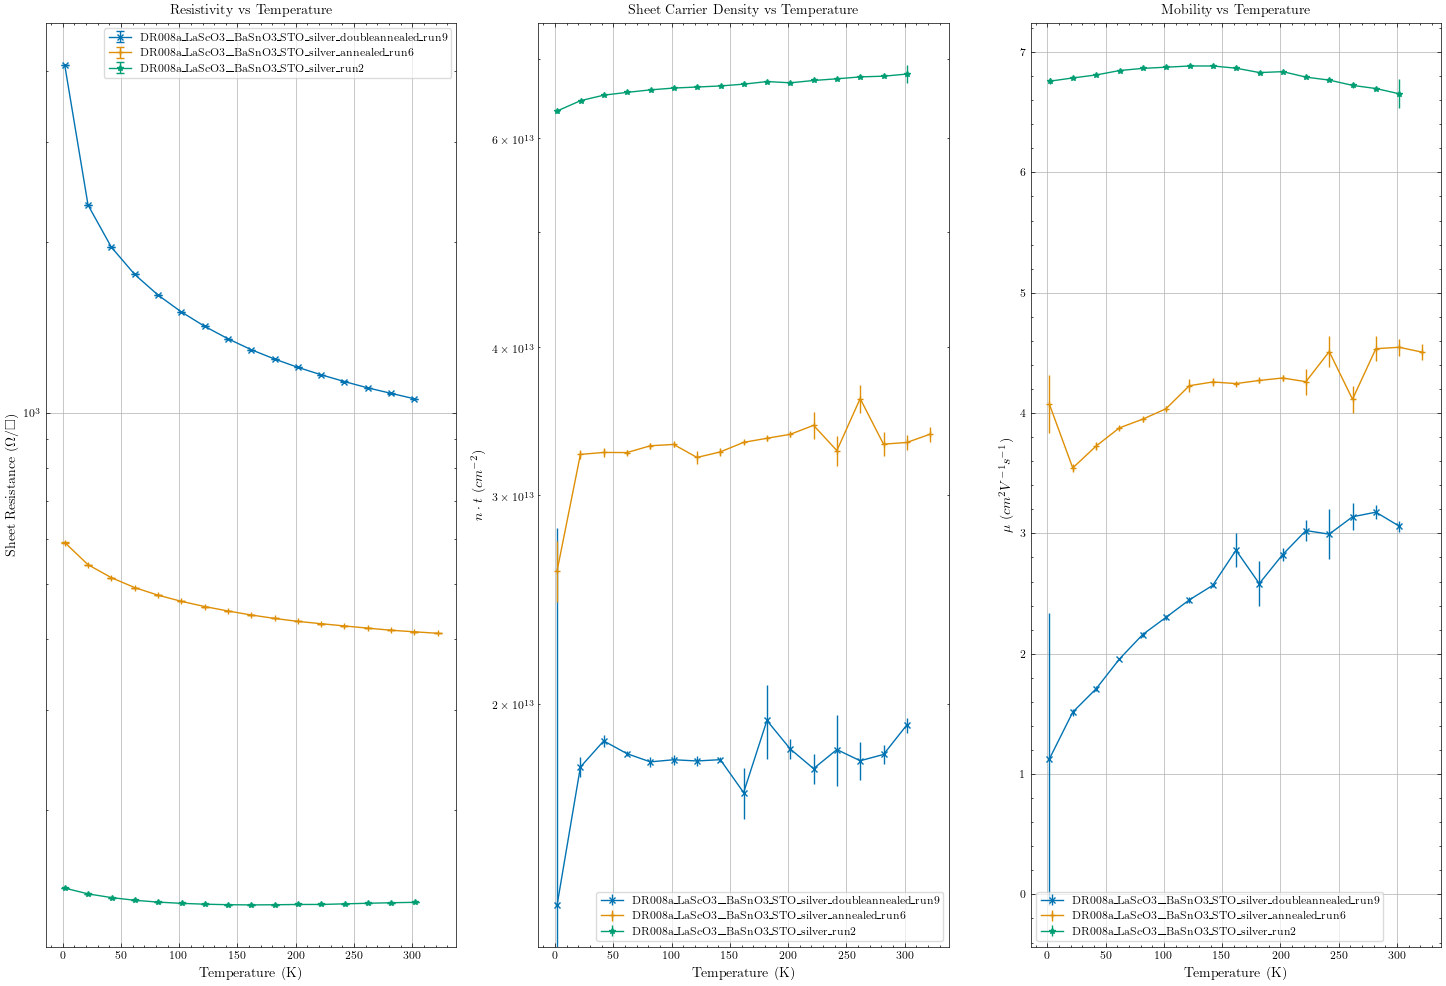

In [18]:
# Generate a figure with 3 subplots
fig14 = plt.figure(figsize=(fig_size[0]*2, fig_size[1]*2))
gs = gridspec.GridSpec(1, 3, wspace=0.2)

# Create axes for the three plots
ax = fig14.add_subplot(gs[0])   # Resistivity
ax1 = fig14.add_subplot(gs[1])  # Carrier density
ax2 = fig14.add_subplot(gs[2])  # Mobility

# Loop over all datasets once to populate all three plots
for j, d in enumerate(dat):
    # Get the middle B field index
    Bi = int(d.ctf[5]/2)
    
    # Plot 1: Resistivity vs Temperature
    ax.errorbar(d.res_data[:, Bi, 0], 
                d.res_data[:, Bi, 4] * unit_scale, 
                yerr=d.res_data[:, Bi, 5] * unit_scale,
                fmt='-'+mark_p[j], 
                capsize=3, 
                label=f'{d.plot_str}')
    
    # Plot 2: Carrier Density vs Temperature
    ax1.errorbar(d.hall_coefficient[:, 0], 
                d.hall_coefficient[:, 7],
                yerr=d.hall_coefficient[:, 8], 
                fmt='-'+mark_p[j], 
                label=f'{d.plot_str}')
    
    # Plot 3: Mobility vs Temperature
    ax2.errorbar(d.hall_coefficient[:, 0], 
                d.hall_coefficient[:, 9],
                yerr=d.hall_coefficient[:, 10], 
                fmt='-'+mark_p[j], 
                label=f'{d.plot_str}')

# Set up axis labels and scales for all plots

# Plot 1: Resistivity
ax.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax.set_ylabel(r'Sheet Resistance ($\Omega/\square$)')
elif ohm_m == 1:
    ax.set_ylabel(r'Resistivity ($\Omega \cdot$m)')
else:
    ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')
ax.set_yscale('log')
ax.set_title('Resistivity vs Temperature')

# Plot 2: Carrier Density
ax1.set_xlabel('Temperature (K)')
if dat[0].film_thickness == 1:
    ax1.set_ylabel(r'$n\cdot t$ ($cm^{-2}$)')
    ax1.set_title('Sheet Carrier Density vs Temperature')
else:
    ax1.set_ylabel(r'$n$ ($cm^{-3}$)')
    ax1.set_title('Carrier Density vs Temperature')
# Set log scale for carrier density if needed
ax1.set_yscale('log')

# Plot 3: Mobility
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel(r'$\mu$ ($cm^2V^{-1}s^{-1}$)')
ax2.set_title('Mobility vs Temperature')
# Set log scale for mobility if needed
# ax2.set_yscale('log')

# Add legends to each subplot
ax.legend(frameon=True, framealpha=0.7)
ax1.legend(frameon=True, framealpha=0.7)
ax2.legend(frameon=True, framealpha=0.7)

# Apply tight layout
plt.tight_layout()

# Show the plot
plt.show()

# Save the figure if export_data is True
if export_data == True:
    fig14.savefig(dat[0].directory.joinpath(f'{dat[0].plot_str}_combined_transport.{fig_format}'), 
                 dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Powerpoint Export

In [17]:

if export_data == True:
    # Create a PowerPoint presentation object
    prs = Presentation()

    # Define a function to add a slide with a title and image
    def add_slide(prs, title, fig):
        slide_layout = prs.slide_layouts[5]  # Use a blank slide layout
        slide = prs.slides.add_slide(slide_layout)
        
        # Set background color with 40% transparency
        background = slide.background
        fill = background.fill
        fill.solid()
        fill.fore_color.rgb = RGBColor(200, 200, 200)

        # Add title with custom font
        title_shape = slide.shapes.title
        title_shape.text = title
        title_shape.text_frame.paragraphs[0].font.size = Pt(24)
        title_shape.text_frame.paragraphs[0].font.bold = True
        title_shape.text_frame.paragraphs[0].font.color.rgb = RGBColor(0, 0, 0)
        title_shape.text_frame.paragraphs[0].font.name = 'Arial'
        title_shape.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

        # Save the figure as an image
        img_path = dat[0].directory.joinpath(f'{title}.png')
        fig.savefig(img_path, dpi=300, bbox_inches='tight', transparent=True)
               
         # Calculate the left position to center the image
        slide_width = prs.slide_width
        image_width = Inches(fig_size[0])
        left = (slide_width - image_width) / 2
        top = Inches(2)  # Position the figure lower down by 2 inches
        
        # Add the image to the slide
        pic = slide.shapes.add_picture(img_path, left, top, width=image_width)

    # List of figures and their corresponding titles
    figures = [
        (fig1, "Plot IV data from Resistivity Measurement to Check Linearity"),
        (fig2, "R-squared Analysis to Check Linearity of I-V Resistivity data"),
        (fig3, "Resistivity Configuration Compararison"),
        (fig4, "Resistivity vs Temperature"),
        (fig5, "Resistivity vs Temperature at B=0"),
        (fig6, "Resistivity vs H"),
        (fig7, "Magnetoresistance vs H"),
        (fig8, "Magnetoresistance Vs T"),
        (fig9, "Arhenius Plot"),
        (fig10, "Log(R) vs Log(T)"),
        (fig11, "Plot IV data of Hall Measurement to Check Linearity"),
        (fig12, "R-squared Analysis to Check Linearity of Resistivity I-V data"),
        (fig13, "Hall resisitivity vs Temperature"),
        (fig14, "Hall resisitivity vs Applied Field"),
        (fig15, "Hall resisitivity vs Applied Field - Offset Removed"),
        (fig16, "Charge Carrier Density Vs T"),
        (fig17, "Mobility vs T"),
        (fig18, "Mobility and Charge Carrier Density vs T"),
        (fig19, "Charge Carrier Density Vs T"),
        (fig20, "Mobility vs T"),       
        (fig21, "ρ_xy vs ρ_xx"),

        
        
        
    ]

    # Add each figure to the PowerPoint presentation
    for fig, title in figures:
        add_slide(prs, title, fig)

    # Save the PowerPoint presentation
    prs.save(dat[0].directory.joinpath(f'{dat[0].filename}_Pub_{powerpoint_string}.pptx'))